In [ ]:
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
import pandas as pd

In [ ]:
features,true_labels = make_blobs(n_samples=200,
                                    centers=3,
                                    cluster_std=2.75,
                                    random_state=42)

In [ ]:
features[:5]

array([[  9.77075874,   3.27621022],
       [ -9.71349666,  11.27451802],
       [ -6.91330582,  -9.34755911],
       [-10.86185913, -10.75063497],
       [ -8.50038027,  -4.54370383]])

In [ ]:
scaler=StandardScaler()
scaled_features=scaler.fit_transform(features)
scaled_features[:5]

array([[ 2.13082109,  0.25604351],
       [-1.52698523,  1.41036744],
       [-1.00130152, -1.56583175],
       [-1.74256891, -1.76832509],
       [-1.29924521, -0.87253446]])

In [ ]:
kmeans=KMeans(init='random',n_clusters=3,n_init=10,max_iter=300,random_state=42)

In [ ]:
kmeans.fit(scaled_features)

KMeans(init='random', n_clusters=3, n_init=10, random_state=42)

In [ ]:
kmeans.inertia_

74.57960106819854

In [ ]:
kmeans.cluster_centers_


array([[ 1.19539276,  0.13158148],
       [-0.25813925,  1.05589975],
       [-0.91941183, -1.18551732]])

In [ ]:
kmeans.n_iter_

10

In [ ]:
kmeans.labels_[:5]

array([0, 1, 2, 2, 2], dtype=int32)

In [ ]:
kmeans_kwargs={"init":"random","n_init":10,"max_iter":300,"random_state":42}

In [ ]:
sse=[]
for k in range(1,11):
  kmeans=KMeans(n_clusters=k,**kmeans_kwargs)
  kmeans.fit(scaled_features)
  sse.append(kmeans.inertia_)


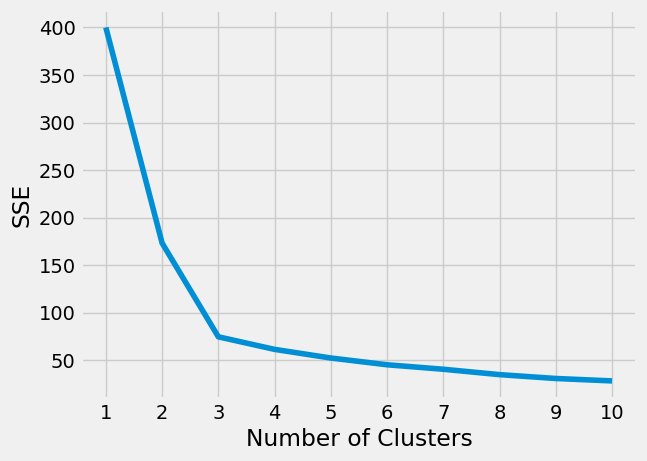

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(1,11),sse)
plt.xticks(range(1,11))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [ ]:
silhouette_coefficents=[]
for k in range(2,11):
  kmeans=KMeans(n_clusters=k,**kmeans_kwargs)
  kmeans.fit(scaled_features)
  score=silhouette_score(scaled_features,kmeans.labels_)
  silhouette_coefficents.append(score)

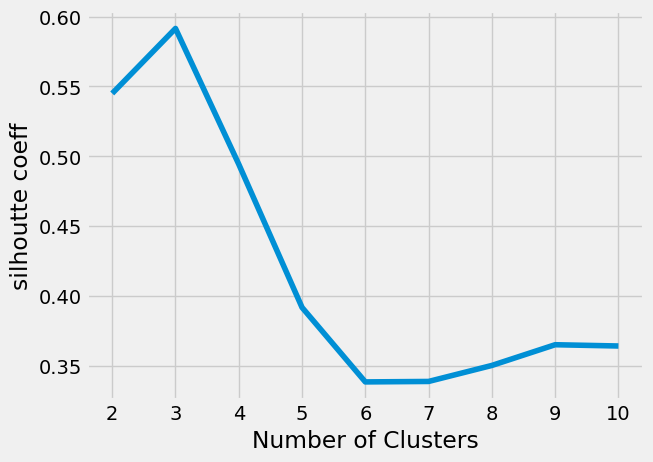

In [ ]:
plt.style.use("fivethirtyeight")
plt.plot(range(2,11),silhouette_coefficents)
plt.xticks(range(2,11))
plt.xlabel("Number of Clusters")
plt.ylabel("silhoutte coeff")
plt.show()

In [ ]:
df=pd.read_csv('/content/train-t.csv')

In [ ]:
df.info()
df.dropna()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S
...,...,...,...,...,...,...,...,...,...,...,...,...
871,872,1,1,"Beckwith, Mrs. Richard Leonard (Sallie Monypeny)",female,47.0,1,1,11751,52.5542,D35,S
872,873,0,1,"Carlsson, Mr. Frans Olof",male,33.0,0,0,695,5.0000,B51 B53 B55,S
879,880,1,1,"Potter, Mrs. Thomas Jr (Lily Alexenia Wilson)",female,56.0,0,1,11767,83.1583,C50,C
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S


In [ ]:
import urllib.request
import tarfile
import numpy as np

In [ ]:
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score,adjusted_rand_score
from sklearn.pipeline import Pipeline

In [ ]:
uci_tcga_url="https://archive.ics.uci.edu/ml/machine-learning-databases/00401/"
archive_name="TCGA-PANCAN-HiSeq-801x20531.tar.gz"
full_download_url=uci_tcga_url+archive_name
r=urllib.request.urlretrieve(full_download_url,archive_name)
tar=tarfile.open(archive_name,"r:gz")
tar.extractall()
tar.close()

In [ ]:
datafile="TCGA-PANCAN-HiSeq-801x20531/data.csv"
labelsfile="TCGA-PANCAN-HiSeq-801x20531/labels.csv"
data=np.genfromtxt(datafile,delimiter=",",skip_header=1)
labels=np.genfromtxt(labelsfile,delimiter=",",skip_header=1,dtype=str)


In [ ]:
data[:5,:3]

array([[       nan, 0.        , 2.01720929],
       [       nan, 0.        , 0.59273209],
       [       nan, 0.        , 3.51175898],
       [       nan, 0.        , 3.66361787],
       [       nan, 0.        , 2.65574107]])

In [ ]:
df['Age'] = df['Age'].fillna(df['Age'].mean())

In [ ]:
features = ['Pclass', 'Age', 'Fare', 'SibSp', 'Parch']
X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=42)
df['Cluster'] = kmeans.fit_predict(X_scaled)


In [ ]:
print(df[['Pclass', 'Age', 'Fare', 'Cluster']].head())

   Pclass   Age     Fare  Cluster
0       3  22.0   7.2500        1
1       1  38.0  71.2833        2
2       3  26.0   7.9250        1
3       1  35.0  53.1000        2
4       3  35.0   8.0500        1
